In [219]:
import graphviz
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score, f1_score
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import export_graphviz
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'NanumGothic'
plt.rc('font', family='NanumGothic')
matplotlib.rc('axes',unicode_minus=False)
from matplotlib import font_manager, rc
import platform
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [183]:
df = pd.read_csv("C:/Users/82108/2 Big Data 분석/Scale불량.csv", encoding='euc-kr')
df.head()

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   plate_no         1000 non-null   object
 1   rolling_date     1000 non-null   object
 2   scale            1000 non-null   object
 3   spec_long        1000 non-null   object
 4   spec_country     1000 non-null   object
 5   steel_kind       1000 non-null   object
 6   pt_thick         1000 non-null   int64 
 7   pt_width         1000 non-null   int64 
 8   pt_length        1000 non-null   int64 
 9   hsb              1000 non-null   object
 10  fur_no           1000 non-null   object
 11  fur_input_row    1000 non-null   object
 12  fur_heat_temp    1000 non-null   int64 
 13  fur_heat_time    1000 non-null   int64 
 14  fur_soak_temp    1000 non-null   int64 
 15  fur_soak_time    1000 non-null   int64 
 16  fur_total_time   1000 non-null   int64 
 17  fur_ex_temp      1000 non-null   i

In [185]:
df.isna().sum()

plate_no           0
rolling_date       0
scale              0
spec_long          0
spec_country       0
steel_kind         0
pt_thick           0
pt_width           0
pt_length          0
hsb                0
fur_no             0
fur_input_row      0
fur_heat_temp      0
fur_heat_time      0
fur_soak_temp      0
fur_soak_time      0
fur_total_time     0
fur_ex_temp        0
rolling_method     0
rolling_temp       0
descaling_count    0
work_group         0
dtype: int64

#### 결측치가 없음을 알 수 있습니다

In [186]:
df.describe()

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,26.78200,2831.900000,36788.200000,1157.245000,85.972000,1150.928000,71.720000,238.589000,1150.928000,934.637000,8.557000
std,18.13757,494.081478,13912.387116,21.245007,26.346297,17.344384,20.602137,38.194828,17.344384,96.598015,1.604158
min,12.00000,1800.000000,7900.000000,1103.000000,55.000000,1113.000000,35.000000,165.000000,1113.000000,0.000000,5.000000
25%,15.00000,2500.000000,26650.000000,1140.000000,66.000000,1135.750000,57.750000,210.000000,1135.750000,893.750000,8.000000
50%,19.00000,2800.000000,40400.000000,1159.000000,75.000000,1156.000000,66.000000,230.000000,1156.000000,948.000000,9.000000
75%,34.00000,3100.000000,49100.000000,1173.000000,102.250000,1164.000000,81.000000,263.000000,1164.000000,991.000000,10.000000
max,100.00000,4600.000000,54900.000000,1206.000000,158.000000,1185.000000,145.000000,362.000000,1185.000000,1078.000000,10.000000


#### 이제 범주형 변수간에 unique한 값들을 확인해보겠습니다

In [187]:
df['scale'].unique()

array(['양품', '불량'], dtype=object)

In [188]:
df['spec_long'].unique()

array(['AB/EH32-TM', 'NV-E36-TM', 'BV-EH36-TM', 'AB/EH36-TM', 'COMMON',
       'BV-AH32-TM', 'GL-E32-TM', 'GL-E36-TM', 'BV-EH32-TM', 'KS-HSB600',
       'LR-EH36-TM', 'BV-B', 'AB/B', 'LR-B', 'JS-SM490YB', 'KR-B', 'LR-A',
       'JS-SM490A', 'KS-SM400B', 'JS-SM400B', 'KS-SS400', 'KR-A',
       'JS-SS400', 'NV-A', 'KS-SM400A', 'KS-SM490B', 'V42JBN3', 'AB/A',
       'A516-60', 'BV-AH32', 'JS-SM490YA', 'AB/AH32', 'GL-A32', 'LR-AH32',
       'CCS-B', 'NV-B', 'NV-A32', 'KS-SM490A', 'GL-A', 'NK-KA32',
       'LR-AH36', 'A709-36', 'KR-AH32', 'BV-A', 'NK-KA', 'NV-D36-TM',
       'NK-KA32-TM', 'GL-A32-TM', 'LR-AH36-TM', 'LR-EH32-TM', 'NV-E32-TM',
       'KS-HSB500', 'API-2W-50T', 'GL-A36-TM', 'NV-A32-TM', 'NV-D32-TM',
       'NK-KD36-TM', 'GL-D36-TM', 'PILAC-BT33', 'NV-A36-TM', 'BV-AH36-TM',
       'A131-DH36TM', 'BV-AH36-TL', 'SA283-C', 'A283-C', 'JS-SM400A'],
      dtype=object)

In [189]:
df['spec_country'].unique()

array(['미국', '영국', '프랑스', '공통', '독일', '한국', '일본'], dtype=object)

In [190]:
df['steel_kind'].unique()
# T : 티타늄강 
# C: 탄소강

array(['T', 'C'], dtype=object)

In [191]:
df['hsb'].unique()

array(['적용', '미적용'], dtype=object)

In [192]:
df['fur_no'].unique()

array(['1호기', '2호기', '3호기'], dtype=object)

In [193]:
df['fur_input_row'].unique()

array(['1열', '2열'], dtype=object)

In [194]:
df['work_group'].unique()

array(['1조', '2조', '3조', '4조'], dtype=object)

## 현재 후판공정에 대한 도메인 지식이 부족하기 때문에 변수들의 의미를 찾아 보았습니다

### steel_kind
강종을 나타내는 변수로, 강철의 화학적 성분과 물리적 특성에 따라 분류된다. 이 변수와 scale불량 간의 연관성은 다음과 같다. 강종이 다르면 강판의 물성도 달라지기 때문에, 같은 후판공정을 거치더라도 강종에 따라 scale불량의 양과 형태가 달라질 수 있다.

### pt_thick
강판의 두께를 나타내는 변수로, 보통 mm 단위로 표시된다. 이 변수와 scale불량 간의 연관성은 다음과 같다. 강판의 두께가 크면 강판 내부에서의 열의 분포가 균일하지 않아서 scale불량이 발생할 가능성이 높아진다.

### pt_width
강판의 폭을 나타내는 변수로, 보통 mm 단위로 표시된다. 이 변수와 scale불량 간의 연관성은 다음과 같다. 강판의 폭이 크면 강판 표면을 더 많은 양의 냉각수가 스프레이될 수 있으므로, scale불량이 발생할 가능성이 높아진다.

### pt_length
강판의 길이를 나타내는 변수로, 보통 m 단위로 표시된다. 이 변수와 scale불량 간의 연관성은 크게 없다.

### hsb
강판의 경도를 나타내는 변수로, HRC 단위로 표시된다. 이 변수와 scale불량 간의 연관성은 다음과 같다. 강판의 경도가 높으면 scale불량이 발생할 가능성이 높아진다. 이는 경도가 높을수록 강판 내부의 응력이 커져서 강판 표면에서 scale이 발생하기 쉬워지기 때문이다.

### fur_no
압연기의 번호를 나타내는 변수로, 이 변수와 scale불량 간의 연관성은 크게 없다.

### fur_input_row
압연기에 입력된 강판의 행 번호를 나타내는 변수로, 이 변수와 scale불량 간의 연관성은 크게 없다.

### fun_heat_temp
압연 전의 가열 온도를 나타내는 변수로, ℃ 단위로 표시된다. 이 변수와 scale불량 간의 연관성은 다음과 같다. 가열 온도가 높으면 강판 내부의 응력이 커져서 강판 표면에서 scale이 발생하기 쉬워지므로, 가열 온도가 높을수록 scale불량이 발생할 가능성이 높아진다.

### fur_heat_temp
압연 후의 가열 온도를 나타내는 변수로, ℃ 단위로 표시된다. 이 변수와 scale불량 간의 연관성은 다음과 같다. 가열 온도가 높으면 강판 내부의 응력이 커져서 강판 표면에서 scale이 발생하기 쉬워지므로, 가열 온도가 높을수록 scale불량이 발생할 가능성이 높아진다.

### fur_heat_time
강판의 가열 시간을 나타내는 변수로, 초 단위로 표시된다. 이 변수와 scale불량 간의 연관성은 크게 없다.

### fur_soak_temp
가열 후 유지되는 소화 온도를 나타내는 변수로, ℃ 단위로 표시된다. 이 변수와 scale불량 간의 연관성은 크게 없다.

### fur_soak_time
소화 시간을 나타내는 변수로, 초 단위로 표시된다. 이 변수와 scale불량 간의 연관성은 크게 없다.

### fur_total_time
가열 및 소화 총 시간을 나타내는 변수로, 초 단위로 표시된다. 이 변수와 scale불량 간의 연관성은 크게 없다.

### fur_ex_temp
소화 후 경화 처리를 위한 냉각 온도를 나타내는 변수로, ℃ 단위로 표시된다. 이 변수와 scale불량 간의 연관성은 크게 없다.

### rolling_method
압연 방식을 나타내는 변수로, 이 변수와 scale불량 간의 연관성은 크게 없다.

### rolling_temp
압연 온도를 나타내는 변수로, ℃ 단위로 표시된다. 이 변수와 scale불량 간의 연관성은 다음과 같다. 압연 온도가 높으면 강판 내부의 응력이 커져서 강판 표면에서 scale이 발생하기 쉬워지므로, 압연 온도가 높을수록 scale불량이 발생할 가능성이 높아진다.

### descaling_count
강판 표면의 스케일을 제거한 횟수를 나타내는 변수로, 이 변수와 scale불량 간의 연관성은 다음과 같다. 스케일을 제거할수록 강판 표면이 깨끗해지기 때문에, descaling_count가 높을수록 scale불량이 발생할 가능성이 낮아진다.

### work_group
압연 라인을 운영하는 작업자의 그룹

#### 여기서 plate_no는 Plate 번호로써, unique한 값이기 때문에 목표변수인 scale불량에 영향을 안줄 것으로 판단하고 지우겠습니다

#### 또한 단위를 원래 연속형 변수이지만, 단위때문에 object타입이 된것을 변환해보겠습니다


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   plate_no         1000 non-null   object
 1   rolling_date     1000 non-null   object
 2   scale            1000 non-null   object
 3   spec_long        1000 non-null   object
 4   spec_country     1000 non-null   object
 5   steel_kind       1000 non-null   object
 6   pt_thick         1000 non-null   int64 
 7   pt_width         1000 non-null   int64 
 8   pt_length        1000 non-null   int64 
 9   hsb              1000 non-null   object
 10  fur_no           1000 non-null   object
 11  fur_input_row    1000 non-null   object
 12  fur_heat_temp    1000 non-null   int64 
 13  fur_heat_time    1000 non-null   int64 
 14  fur_soak_temp    1000 non-null   int64 
 15  fur_soak_time    1000 non-null   int64 
 16  fur_total_time   1000 non-null   int64 
 17  fur_ex_temp      1000 non-null   i

#### 그리고 describe를 보게되면 rolling_temp(압연온도)의 min이 0인 것을 볼 수 있습니다

#### 이를 평균값으로 채우고 나서 변수들간의 상관관계를 보겠습니다

In [196]:
df['rolling_temp'] = df['rolling_temp'].replace(0,df['rolling_temp'].mean())
df.describe()

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,26.78200,2831.900000,36788.200000,1157.245000,85.972000,1150.928000,71.720000,238.589000,1150.928000,940.244822,8.557000
std,18.13757,494.081478,13912.387116,21.245007,26.346297,17.344384,20.602137,38.194828,17.344384,63.664533,1.604158
min,12.00000,1800.000000,7900.000000,1103.000000,55.000000,1113.000000,35.000000,165.000000,1113.000000,723.000000,5.000000
25%,15.00000,2500.000000,26650.000000,1140.000000,66.000000,1135.750000,57.750000,210.000000,1135.750000,894.000000,8.000000
50%,19.00000,2800.000000,40400.000000,1159.000000,75.000000,1156.000000,66.000000,230.000000,1156.000000,948.000000,9.000000
75%,34.00000,3100.000000,49100.000000,1173.000000,102.250000,1164.000000,81.000000,263.000000,1164.000000,991.000000,10.000000
max,100.00000,4600.000000,54900.000000,1206.000000,158.000000,1185.000000,145.000000,362.000000,1185.000000,1078.000000,10.000000


#### plate_no,rolling_date는 그저 id와 날짜이기 때문에 삭제하고 가겠습니다

In [197]:
df = df.drop(['plate_no','rolling_date'],axis=1)

#### 이제 변수들간의 상관관계를 보기위해 시각화를 진행하겠습니다

### 목표변수와 범주형 설명변수간의 관계를 보겠습니다

Text(0, 0.5, '빈도수')

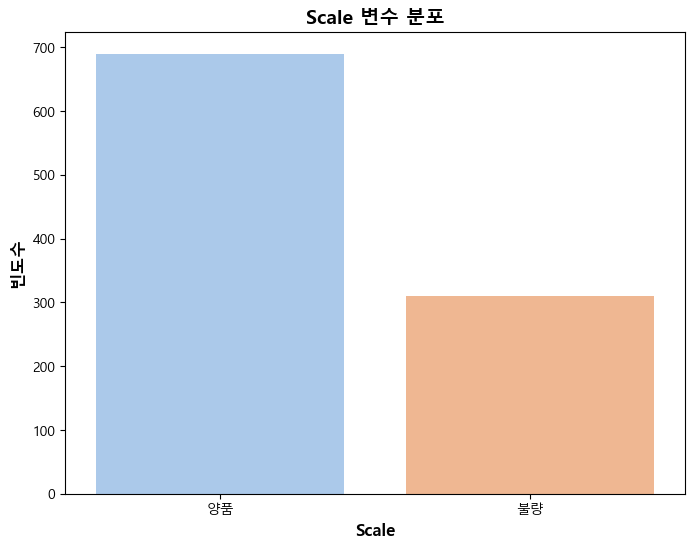

In [198]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='scale', data=df, ax=ax, palette='pastel')
ax.set_title('Scale 변수 분포', fontsize=14, fontweight='bold')
ax.set_xlabel('Scale', fontsize=12, fontweight='bold')
ax.set_ylabel('빈도수', fontsize=12, fontweight='bold')

불량율 자체가 조금 높음을 알 수 있다

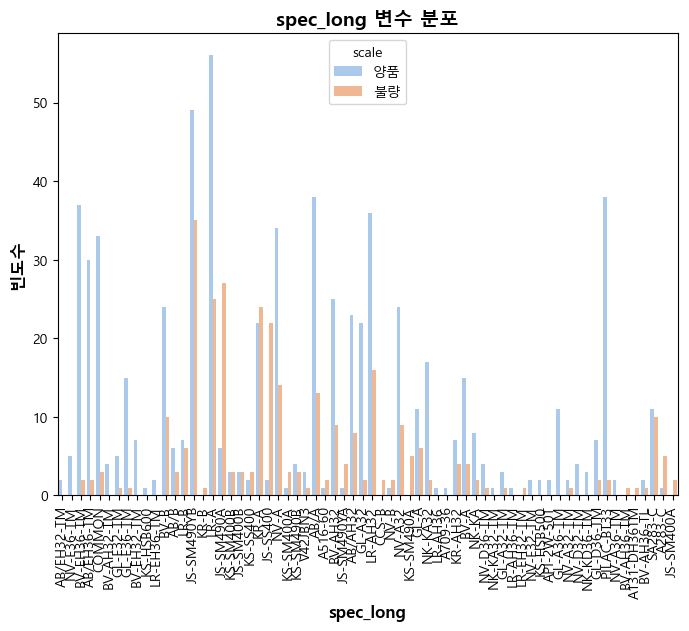

In [199]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='spec_long', hue='scale', data=df, ax=ax, palette='pastel')
ax.set_title('spec_long 변수 분포', fontsize=14, fontweight='bold')
ax.set_xlabel('spec_long', fontsize=12, fontweight='bold')
ax.set_ylabel('빈도수', fontsize=12, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

규격별로 불량율이 다름을 알 수 있습니다. 그런데 1000개의 데이터에 이렇게 많은 규격이 의미가 없다고 생각이 듭니다

Text(0, 0.5, '빈도수')

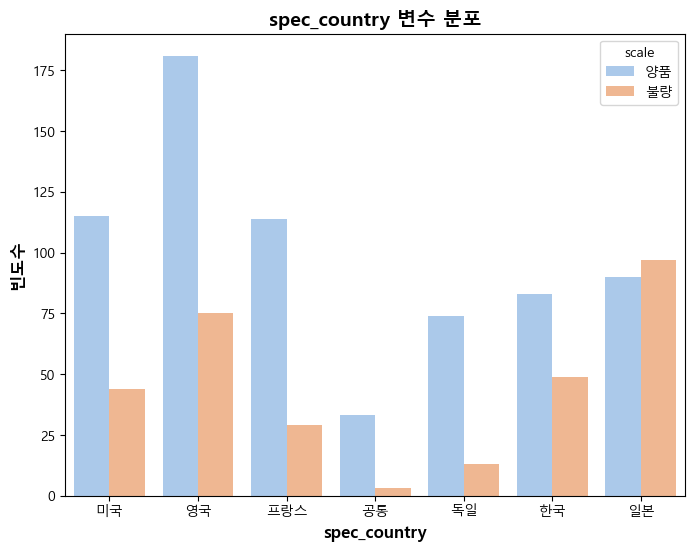

In [200]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='spec_country', hue='scale', data=df, ax=ax, palette='pastel')
ax.set_title('spec_country 변수 분포', fontsize=14, fontweight='bold')
ax.set_xlabel('spec_country', fontsize=12, fontweight='bold')
ax.set_ylabel('빈도수', fontsize=12, fontweight='bold')

한국도 불량율이 굉장히 높으편이나, 일본은 불량율이 양품율보다 높음을 볼 수 있다

Text(0, 0.5, '빈도수')

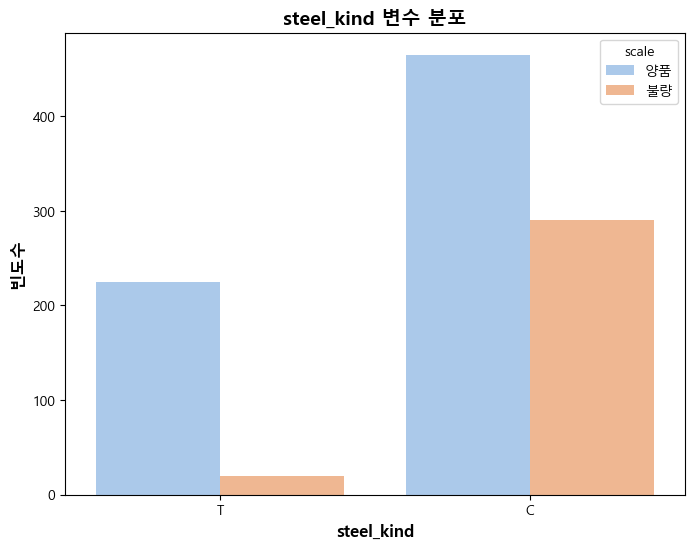

In [201]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='steel_kind', hue='scale', data=df, ax=ax, palette='pastel')
ax.set_title('steel_kind 변수 분포', fontsize=14, fontweight='bold')
ax.set_xlabel('steel_kind', fontsize=12, fontweight='bold')
ax.set_ylabel('빈도수', fontsize=12, fontweight='bold')

티타늄강(T)가 탄소강(C)보다 불량율이 현저히 적음을 알 수 있습니다

Text(0, 0.5, '빈도수')

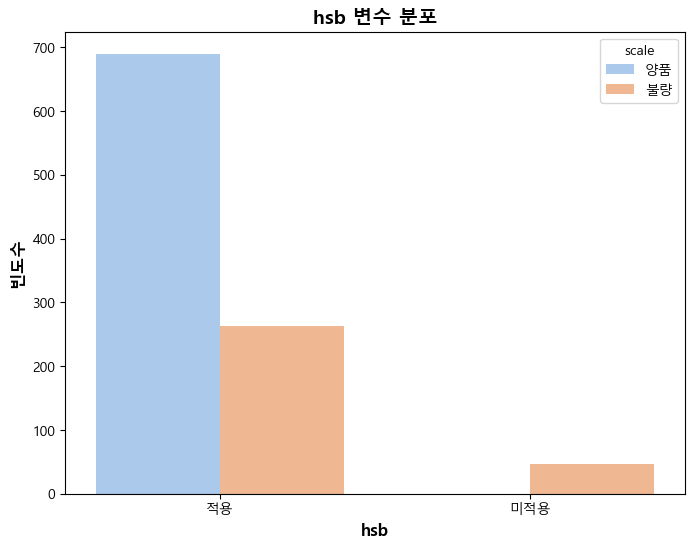

In [202]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='hsb', hue='scale', data=df, ax=ax, palette='pastel')
ax.set_title('hsb 변수 분포', fontsize=14, fontweight='bold')
ax.set_xlabel('hsb', fontsize=12, fontweight='bold')
ax.set_ylabel('빈도수', fontsize=12, fontweight='bold')

hsb를 미적용할 시, 모두 불량이 나왔음을 알 수 있습니다

Text(0, 0.5, '빈도수')

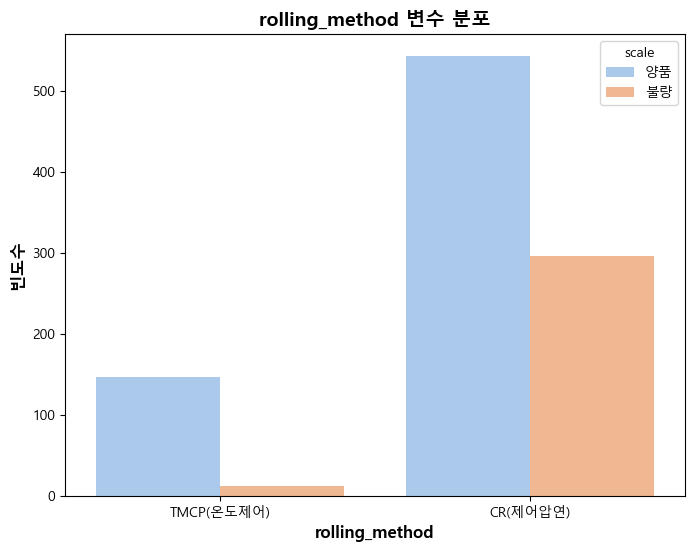

In [203]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='rolling_method', hue='scale', data=df, ax=ax, palette='pastel')
ax.set_title('rolling_method 변수 분포', fontsize=14, fontweight='bold')
ax.set_xlabel('rolling_method', fontsize=12, fontweight='bold')
ax.set_ylabel('빈도수', fontsize=12, fontweight='bold')

TMCP(온도제어)방식이 CR(제어압연)방식보다 불량율이 현저히 낮음을 알 수 있습니다

### 목표변수와 연속형 설명변수간의 관계를 보겠습니다

<AxesSubplot:xlabel='scale', ylabel='pt_thick'>

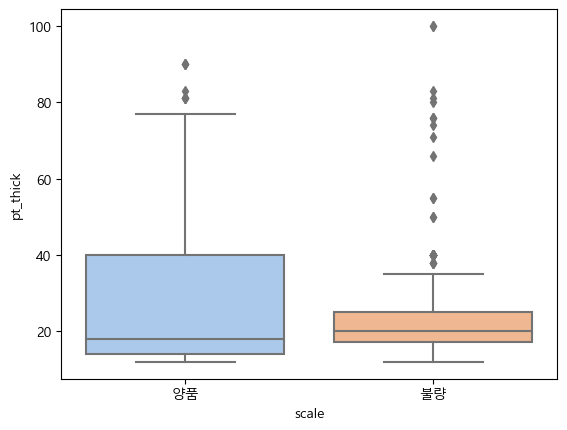

In [204]:
sns.boxplot(x = "scale", y = "pt_thick",data = df,palette='pastel')

불량율에 이상치가 많이 보입니다

<AxesSubplot:xlabel='scale', ylabel='pt_width'>

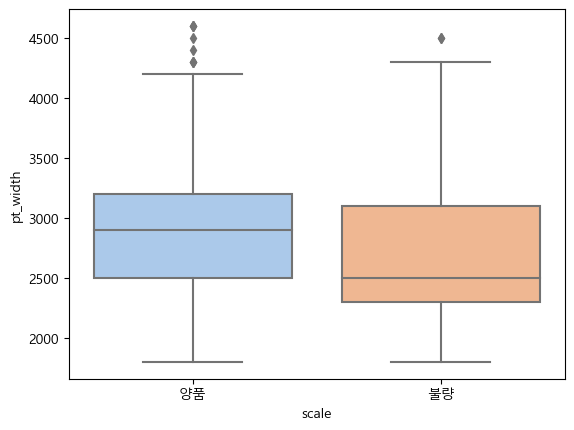

In [205]:
sns.boxplot(x = "scale", y = "pt_width",data = df,palette='pastel')

<AxesSubplot:xlabel='scale', ylabel='pt_length'>

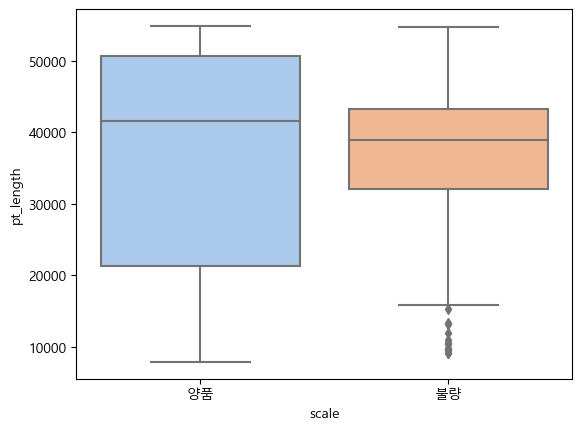

In [206]:
sns.boxplot(x = "scale", y = "pt_length",data = df,palette='pastel')

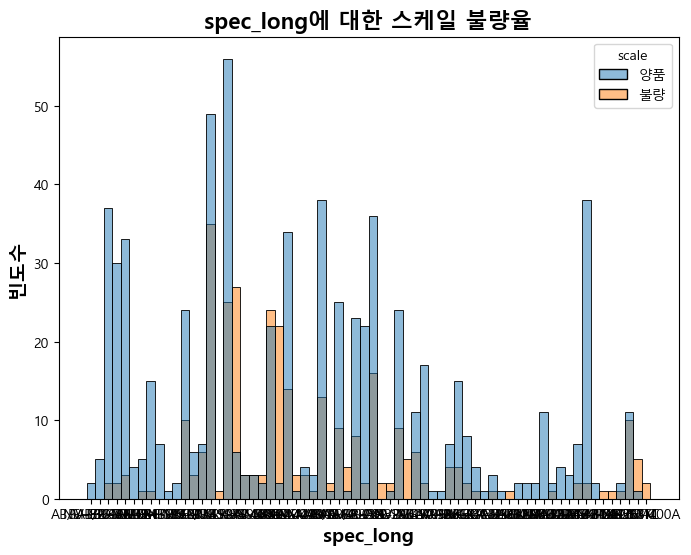

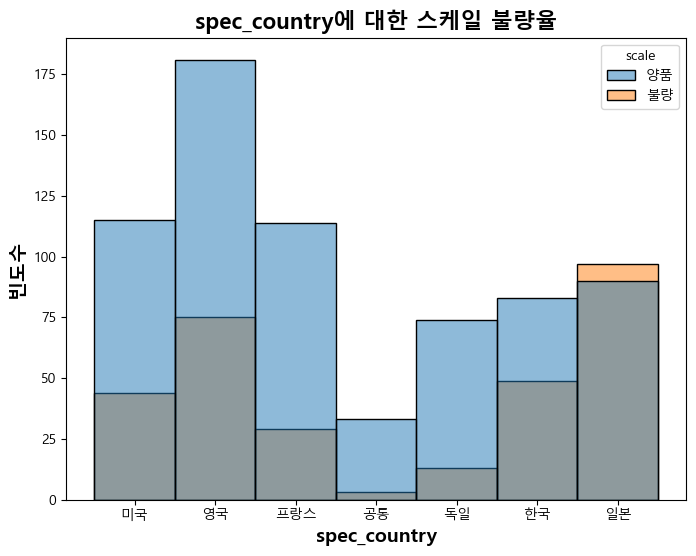

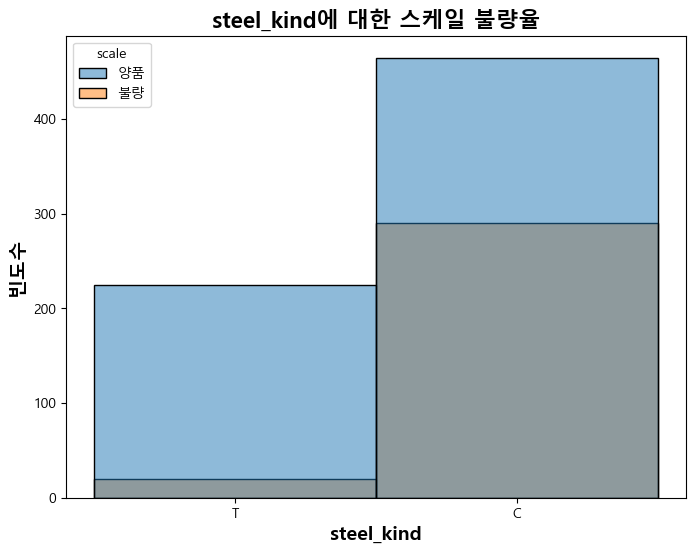

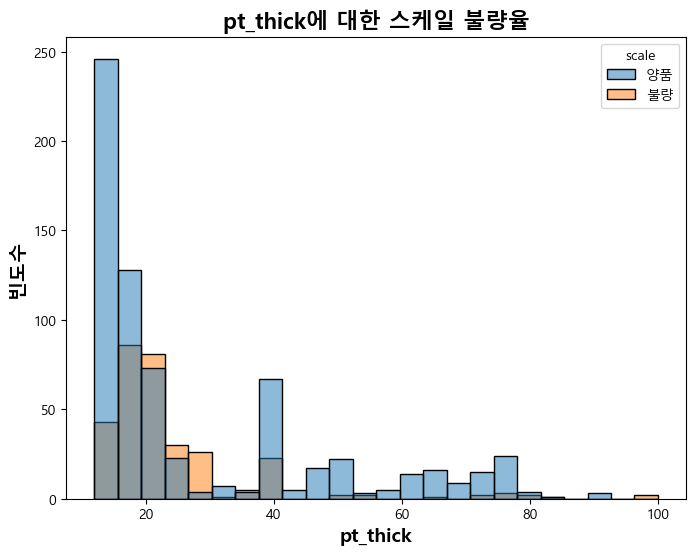

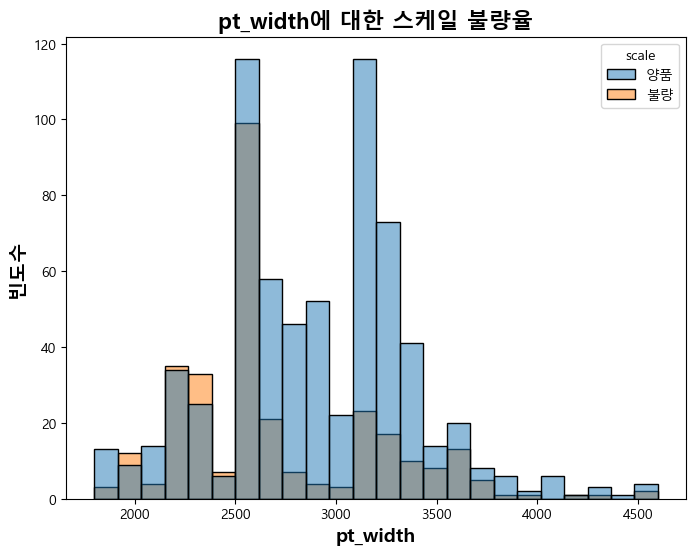

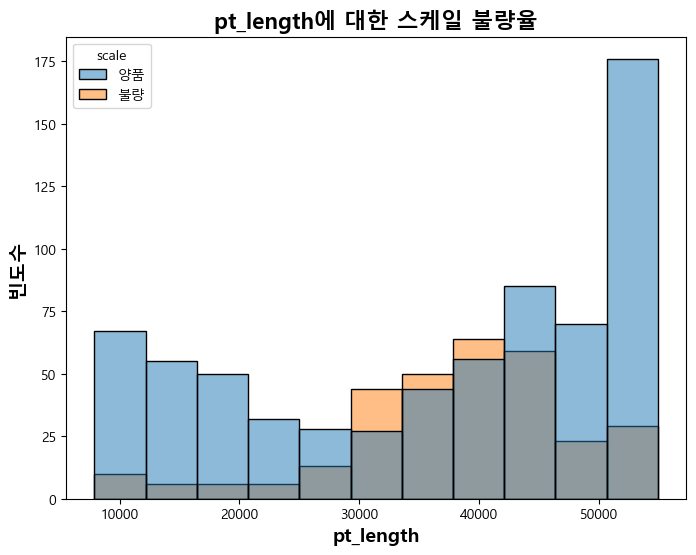

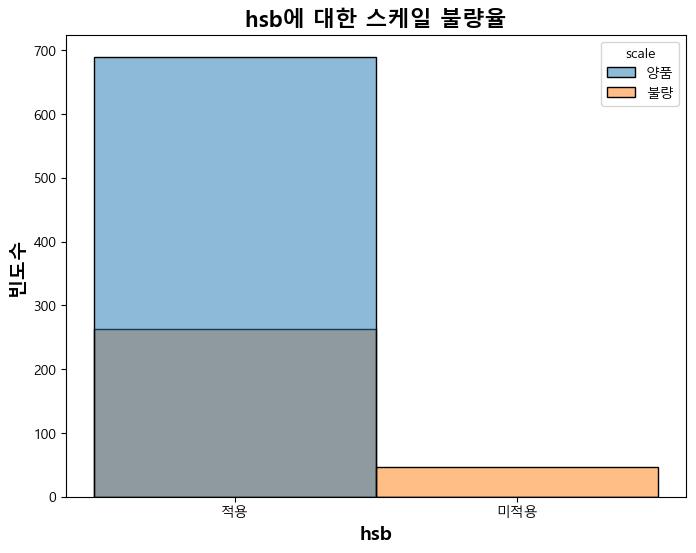

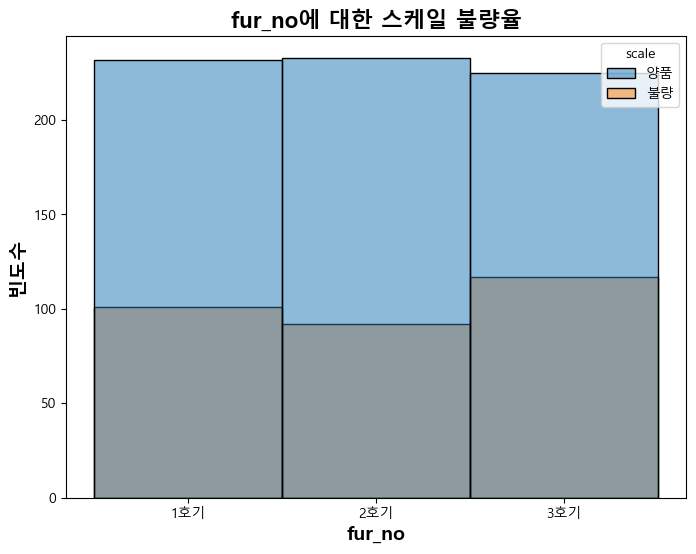

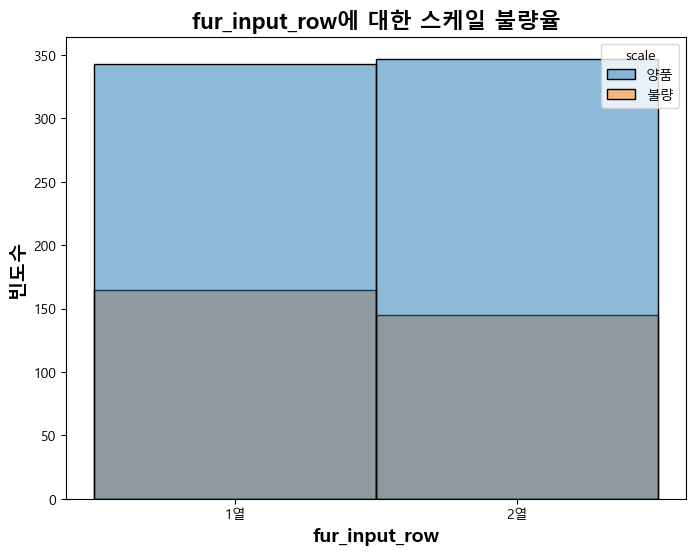

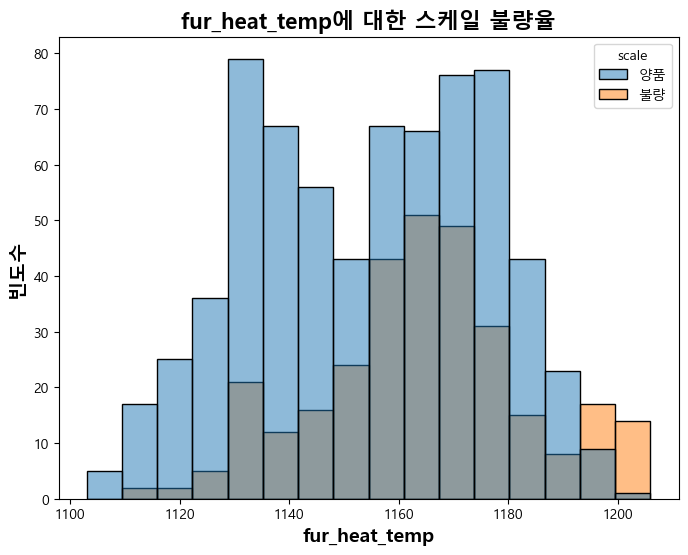

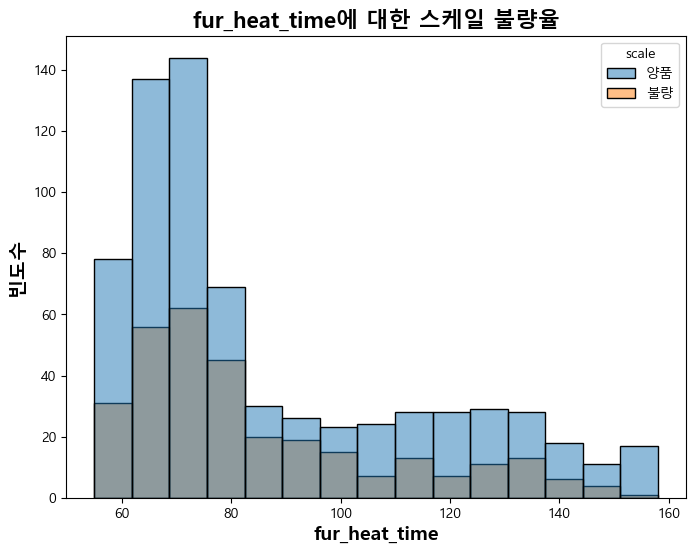

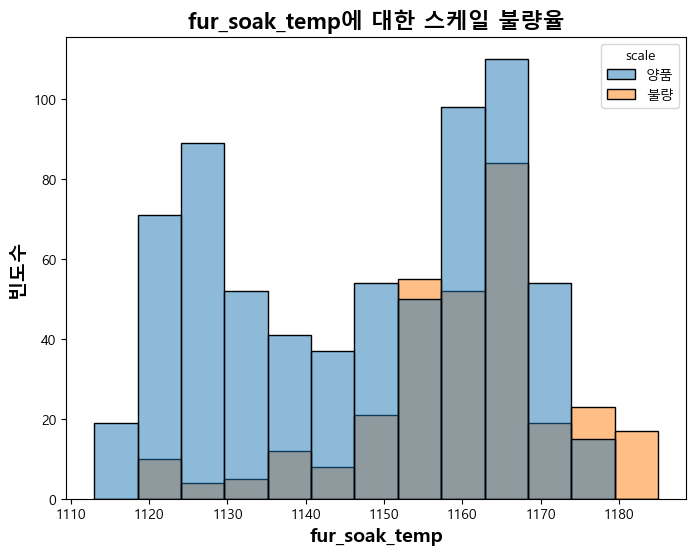

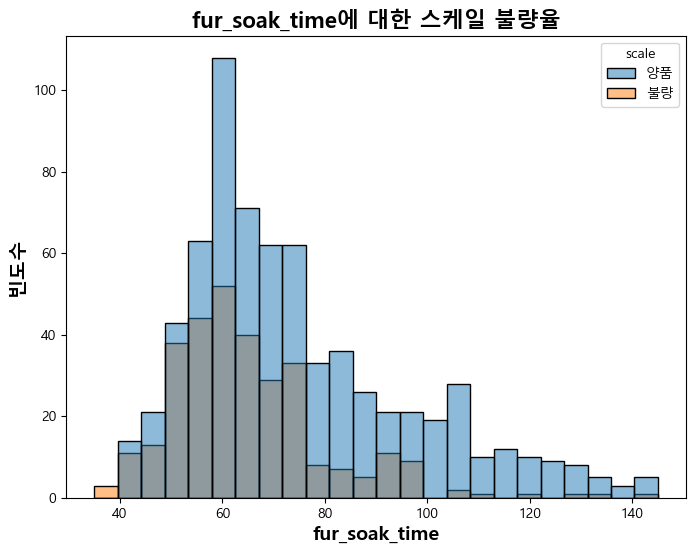

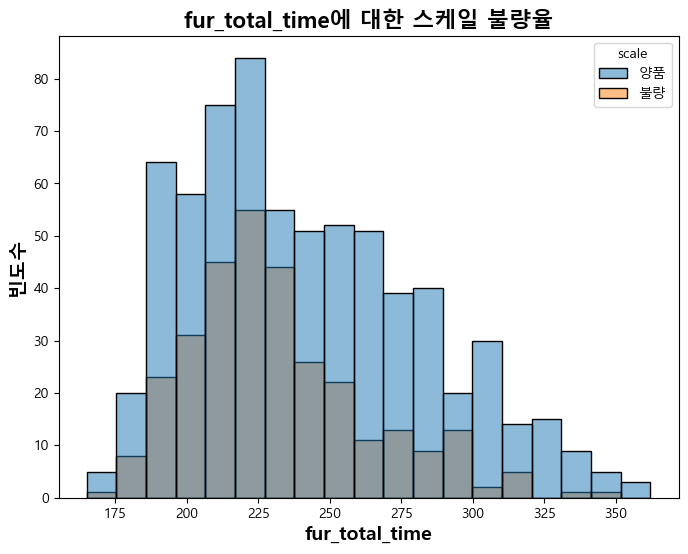

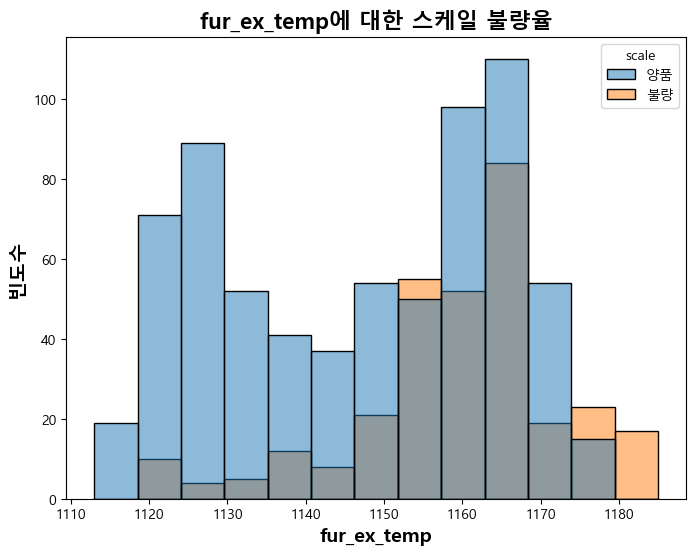

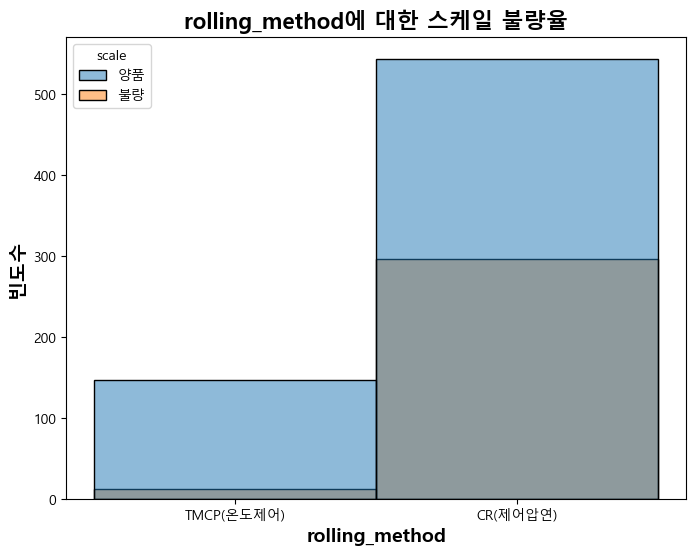

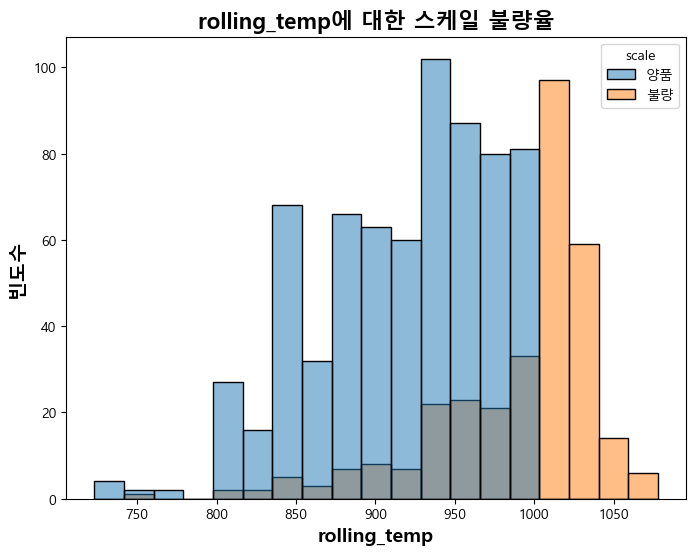

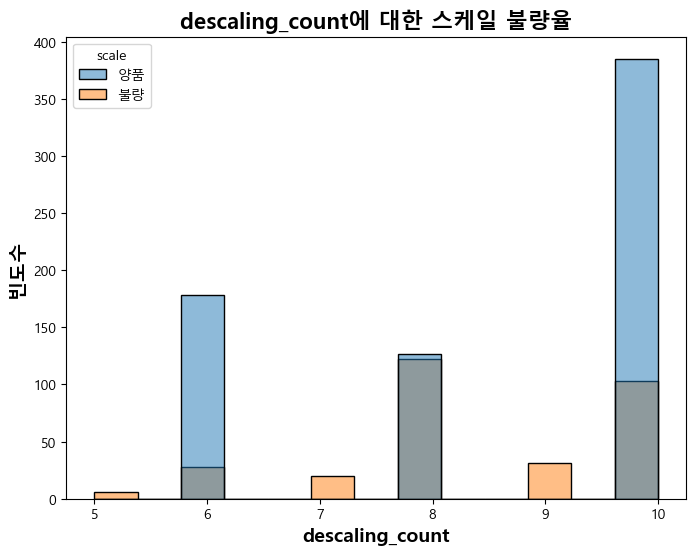

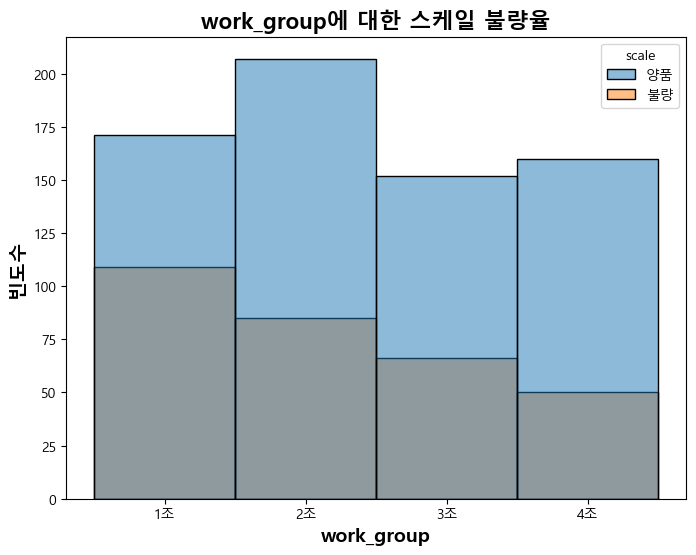

In [207]:
for col in df.columns[1:]:
    fig, ax = plt.subplots(figsize=(8,6))
    sns.histplot(data=df, x=col, hue='scale', ax=ax)
    ax.set_title(f'{col}에 대한 스케일 불량율', fontsize=16, fontweight='bold')
    ax.set_xlabel(col, fontsize=14, fontweight='bold')
    ax.set_ylabel('빈도수', fontsize=14, fontweight='bold')
    plt.show()

이제 가설검정을 통해 유의미한 변수를 찾아보겠습니다

먼저 수치형 설명변수들과의 로지스틱 회귀분석을 해보겠습니다

In [208]:
df_train, df_test = train_test_split(df,test_size=0.3,random_state=1234)
print('train data size:{}'.format(df_train.shape))
print('test data size:{}'.format(df_test.shape))

train data size:(700, 20)
test data size:(300, 20)


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   scale            1000 non-null   object 
 1   spec_long        1000 non-null   object 
 2   spec_country     1000 non-null   object 
 3   steel_kind       1000 non-null   object 
 4   pt_thick         1000 non-null   int64  
 5   pt_width         1000 non-null   int64  
 6   pt_length        1000 non-null   int64  
 7   hsb              1000 non-null   object 
 8   fur_no           1000 non-null   object 
 9   fur_input_row    1000 non-null   object 
 10  fur_heat_temp    1000 non-null   int64  
 11  fur_heat_time    1000 non-null   int64  
 12  fur_soak_temp    1000 non-null   int64  
 13  fur_soak_time    1000 non-null   int64  
 14  fur_total_time   1000 non-null   int64  
 15  fur_ex_temp      1000 non-null   int64  
 16  rolling_method   1000 non-null   object 
 17  rolling_temp   

In [210]:
for col in df.columns[1:]:
    crosstab = pd.crosstab(df['scale'], df[col])
    chi2_stat, p_val, dof, expected = stats.chi2_contingency(crosstab)
    print(f'Chi-square Test Results for {col}')
    print(f'chi2_statistic: {chi2_stat:.3f}, p-value: {p_val:.3f}, degrees of freedom: {dof}')
    print('---------------------------------------------------------------')

Chi-square Test Results for spec_long
chi2_statistic: 237.732, p-value: 0.000, degrees of freedom: 65
---------------------------------------------------------------
Chi-square Test Results for spec_country
chi2_statistic: 68.384, p-value: 0.000, degrees of freedom: 6
---------------------------------------------------------------
Chi-square Test Results for steel_kind
chi2_statistic: 77.710, p-value: 0.000, degrees of freedom: 1
---------------------------------------------------------------
Chi-square Test Results for pt_thick
chi2_statistic: 228.548, p-value: 0.000, degrees of freedom: 47
---------------------------------------------------------------
Chi-square Test Results for pt_width
chi2_statistic: 127.816, p-value: 0.000, degrees of freedom: 28
---------------------------------------------------------------
Chi-square Test Results for pt_length
chi2_statistic: 527.337, p-value: 0.000, degrees of freedom: 277
---------------------------------------------------------------
Chi-s

여기서 p-value가 0.05보다 작은경우, 유의미한 변수로 판단하여 귀무가설을 기각하고 대립가설을 채택한다

따라서 선택한 범주형 변수는 spec_long,spec_country,steel_kind,hsb,rolling_method,work_group 입니다. 따라서 선택되지 않은 변수들은fur_no,fur_input_row 입니다

#### 이제 수치형 변수들과 로지스틱 회귀분석을 해보겠습니다

In [211]:
df['scale'] = df['scale'].replace(['양품','불량'],[0,1]).astype('int64')

In [212]:
df_train, df_test = train_test_split(df,test_size=0.3,random_state=1234)
print('train data size:{}'.format(df_train.shape))
print('test data size:{}'.format(df_test.shape))

train data size:(700, 20)
test data size:(300, 20)


In [213]:
log_model = Logit.from_formula('scale ~ pt_thick+pt_width+pt_length+fur_heat_temp+fur_heat_time+fur_soak_temp+fur_soak_time+fur_total_time+fur_ex_temp+rolling_temp',df_train)
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.416071
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  700
Model:                          Logit   Df Residuals:                      689
Method:                           MLE   Df Model:                           10
Date:                Tue, 07 Mar 2023   Pseudo R-squ.:                  0.3267
Time:                        04:32:41   Log-Likelihood:                -291.25
converged:                       True   LL-Null:                       -432.57
Covariance Type:            nonrobust   LLR p-value:                 7.237e-55
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -98.2544     14.709     -6.680      0.000    -127.083     -69.426
pt_thick         

In [215]:
y_pred_train = log_result.predict(df_train)
y_pred_train_class = (y_pred_train>0.5).astype(int)
print('Train예측결과\n',y_pred_train_class.head(),'\n')
print('Confusion Matrix:\n{}'.format(confusion_matrix(df_train['scale'],y_pred_train_class)),'\n')

Train예측결과
 96     0
792    0
218    1
967    0
170    1
dtype: int32 

Confusion Matrix:
[[445  39]
 [ 68 148]] 



In [216]:
y_pred_test = log_result.predict(df_test)
y_pred_test_class = (y_pred_test>0.5).astype(int)
print('Test예측결과\n',y_pred_test_class.head(),'\n')
print('Confusion Matrix:\n{}'.format(confusion_matrix(df_test['scale'],y_pred_test_class)),'\n')

Test예측결과
 681    0
990    1
155    1
768    0
438    0
dtype: int32 

Confusion Matrix:
[[191  15]
 [ 37  57]] 



In [220]:
print("Train 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_train['scale'], y_pred_train_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train['scale'], y_pred_train_class)), "\n")
print(classification_report(df_train['scale'], y_pred_train_class, digits=3))

print("Test 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test['scale'], y_pred_test_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test['scale'], y_pred_test_class)), "\n")
print(classification_report(df_test['scale'], y_pred_test_class, digits=3))

Train 예측/분류 결과
Accuracy: 0.847

Confusion Matrix: 
[[445  39]
 [ 68 148]] 

              precision    recall  f1-score   support

           0      0.867     0.919     0.893       484
           1      0.791     0.685     0.734       216

    accuracy                          0.847       700
   macro avg      0.829     0.802     0.814       700
weighted avg      0.844     0.847     0.844       700

Test 예측/분류 결과
Accuracy: 0.827

Confusion Matrix: 
[[191  15]
 [ 37  57]] 

              precision    recall  f1-score   support

           0      0.838     0.927     0.880       206
           1      0.792     0.606     0.687        94

    accuracy                          0.827       300
   macro avg      0.815     0.767     0.783       300
weighted avg      0.823     0.827     0.820       300



In [222]:
#selct_dtypes:특정 변수 타입을 선택/제외하여 데이터 추출
df_char = df.select_dtypes(include = "object")
df_numeric = df.select_dtypes(exclude = "object")
#Data Scaling
scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)#문자 데이터+숫자 데이터
df_scaled = pd.concat([df_numeric_scaled, df_char],axis=1)
df_scaled.head()

,scale,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count,spec_long,spec_country,steel_kind,hsb,fur_no,fur_input_row,rolling_method,work_group
0,-0.67028,0.287834,1.757877,-1.559693,-0.623753,1.140313,-1.034166,-0.617721,0.534659,-1.034166,-0.098139,-0.347396,AB/EH32-TM,미국,T,적용,1호기,1열,TMCP(온도제어),1조
1,-0.67028,0.287834,1.757877,-1.559693,-0.623753,1.368163,-0.918797,-0.909098,-0.015429,-0.918797,-0.050993,-0.347396,AB/EH32-TM,미국,T,적용,1호기,2열,TMCP(온도제어),1조
2,-0.67028,0.342996,1.555380,-1.264844,-1.330154,1.140313,-1.726379,-0.811972,0.508464,-1.726379,-0.805322,-0.347396,NV-E36-TM,영국,T,적용,2호기,1열,TMCP(온도제어),1조
3,-0.67028,0.342996,1.555380,-1.264844,-0.247005,1.482088,-1.380272,-0.180654,0.718022,-1.380272,-0.868183,-0.347396,NV-E36-TM,영국,T,적용,2호기,2열,TMCP(온도제어),1조
4,-0.67028,0.618805,0.542895,-1.689139,-0.812126,1.823863,-1.322588,-1.151913,0.194129,-1.322588,-1.056765,-0.347396,BV-EH36-TM,프랑스,T,적용,3호기,1열,TMCP(온도제어),1조
